<div class="alert alert-success">
Задание
- Научиться строить архитектуру модели сверточной нейронной сети
- Научиться распознавать факты переобучения и недообучения модели
- Научить бороться с переобучением и недообучением модели путем варьирования ее гиперпараметров
- Научиться применять методы регуляризации для контроля переобучения

Задача:

Построить модель полносвязной и сверточной нейронной сети, которая будет отличать маффин от чихуахуа. Необходимо достичь точности (Accuracy) на тестовом датасете  > 85 % с использованием любой архитектуры нейронной сети

Ссылка на датасет: https://www.kaggle.com/datasets/samuelcortinhas/muffin-vs-chihuahua-image-classification

In [1]:
#!pip install kaggle

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.models import Sequential
from keras.layers import (
    Dense,
    BatchNormalization,
    Dropout,
    Flatten,
    Rescaling,
    Conv2D,
    MaxPooling2D,
    AveragePooling2D,
    LeakyReLU,
)
from keras.callbacks import EarlyStopping

2024-08-16 17:50:34.120949: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-16 17:50:34.142164: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-16 17:50:34.147841: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-16 17:50:34.162787: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-16 17:50:35.266642: W tensorflow/compiler/tf2

In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
plt.style.use("dark_background")
SEED = 1234
tf.config.experimental.enable_op_determinism()
tf.random.set_seed(SEED)

## <div style="border: 1px solid purple; padding: 10px; color: orange"> Задача 1.</div>
Загрузите данные так, как это было показано в видеоуроках или любым другим известным вам способом.

In [5]:
# !kaggle datasets download -d samuelcortinhas/muffin-vs-chihuahua-image-classification

In [6]:
# %mkdir dataset_muffin-vs-chihuahua
# !unzip -q muffin-vs-chihuahua-image-classification.zip -d dataset_muffin-vs-chihuahua

## <div style="border: 1px solid purple; padding: 10px; color: orange"> Задача 2.</div>
Проведите разбиение на тренировочные и тестовые данные.

In [7]:
IMAGE_PATH = "./dataset_muffin-vs-chihuahua"
batch_size = 128
image_size = (64, 64) 

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    f"{IMAGE_PATH}/train",
    color_mode="rgb",
    image_size=image_size,
    batch_size=batch_size,
)

Found 4733 files belonging to 2 classes.


In [9]:
class_names = train_ds.class_names
print(class_names)

['chihuahua', 'muffin']


In [10]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    f"{IMAGE_PATH}/test",
    color_mode="rgb",
    image_size=image_size,
    batch_size=batch_size,
)

Found 1184 files belonging to 2 classes.


## <div style="border: 1px solid purple; padding: 10px; color: orange"> Задача 3.</div>
Реализуйте функцию, в которой вы будете определять архитектуру полносвязной модели нейронной сети без использования слоев свёртки. Функция должна возвращать скомпилированную модель и иметь названия fcc_nn(fully-connected_neural_network). Обучите модель нейронной сети, измеряя точность на каждой эпохе с помощью тестовой выборки. 

In [11]:
def fcc_nn():
    model = Sequential()
    model.add(Rescaling(1./255))
    model.add(Flatten())
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.1))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(2, activation="softmax"))
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

In [12]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3)

In [13]:
model = fcc_nn()
model.fit(train_ds, validation_data=val_ds, epochs=10, callbacks=[early_stopping])

Epoch 1/10


 1/37 ━━━━━━━━━━━━━━━━━━━━ 1:20 2s/step - accuracy: 0.4688 - loss: 0.7430

2024-08-16 17:50:38.708548: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 36636672 exceeds 10% of free system memory.


 3/37 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - accuracy: 0.4948 - loss: 2.8059

2024-08-16 17:50:38.988430: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 36578304 exceeds 10% of free system memory.
2024-08-16 17:50:38.990010: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 40401900 exceeds 10% of free system memory.
2024-08-16 17:50:39.034495: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 36578304 exceeds 10% of free system memory.


 6/37 ━━━━━━━━━━━━━━━━━━━━ 4s 144ms/step - accuracy: 0.4977 - loss: 2.8178

2024-08-16 17:50:39.453125: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 36578304 exceeds 10% of free system memory.


37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - accuracy: 0.5157 - loss: 1.6768 - val_accuracy: 0.5524 - val_loss: 0.6775
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.5951 - loss: 0.6964 - val_accuracy: 0.7179 - val_loss: 0.5919
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.6864 - loss: 0.6015 - val_accuracy: 0.6824 - val_loss: 0.5787
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - accuracy: 0.7074 - loss: 0.5707 - val_accuracy: 0.6486 - val_loss: 0.6507
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - accuracy: 0.7067 - loss: 0.5570 - val_accuracy: 0.7483 - val_loss: 0.5281
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.7477 - loss: 0.5248 - val_accuracy: 0.7703 - val_loss: 0.5136
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.7697 - loss: 0.4951 - val_accuracy: 0.7568 - val_loss: 0.5168
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.7642 - loss: 0.4885 - val_accuracy: 0.7669 - val_

## <div style="border: 1px solid purple; padding: 10px; color: orange"> Задача 4.</div>
Постройте график зависимости ошибки и точности полносвязной нейронной сети в зависимости от эпох.

In [14]:
plt.rcParams["font.size"] = 12
param_plt_1 = {"linewidth": 3, "color": "orange"}
param_plt_2 = {"linewidth": 3, "color": "brown"}


def plot_graph(train_auc, val_auc, train_loss, val_loss):
    """
    Функция выведет на экран графики Accuracy и ошибки на валидационной и обучающей выборках.
    """
    plt.figure(figsize=(12, 9))
    plt.subplot(2, 2, 1)
    epochs = range(1, len(train_auc) + 1)
    plt.title("Accuracy", fontweight="bold")
    plt.plot(epochs, train_auc, label="train", **param_plt_1)
    plt.plot(epochs, val_auc, label="val", **param_plt_2)
    plt.xlabel("Эпоха обучения")
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.title("Ошибка", fontweight="bold")
    plt.plot(train_loss, label="train", **param_plt_1)
    plt.plot(val_loss, label="val", **param_plt_2)
    plt.xlabel("Эпоха обучения")
    plt.legend()
    plt.show()

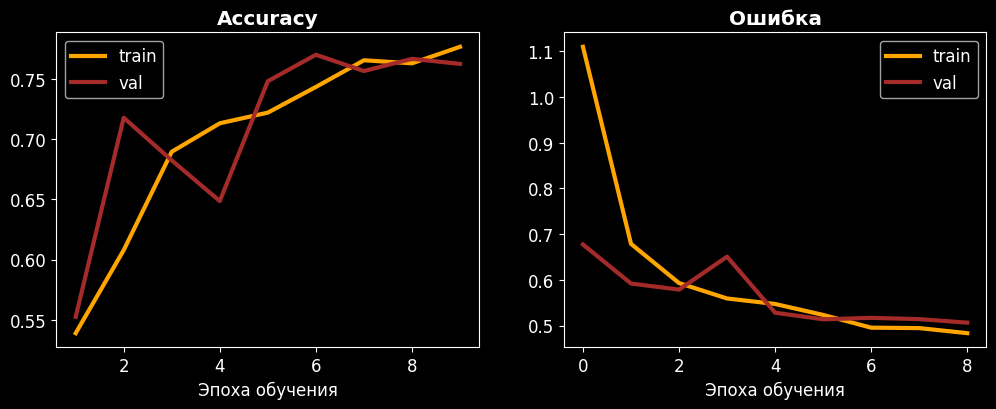

In [15]:
plot_graph(
    model.history.history["accuracy"],
    model.history.history["val_accuracy"],
    model.history.history["loss"],
    model.history.history["val_loss"],
)

Вывод: модель быстро переобучается.

## <div style="border: 1px solid purple; padding: 10px; color: orange"> Задача 5.</div>
Реализуйте функцию, в которой вы будете определять архитектуру полносвязной модели нейронной сети, с использованием слоев свёртки, регуляризации, препроцессинга изображений(Rescaling). Функция должна возвращать скомпилированную модель и иметь названия conv_nn(convolutional_neural_network). Обучите модель нейронной сети, измеряя точность на каждой эпохе с помощью тестовой выборки. 

In [16]:
def conv_nn():
    model = Sequential()
    model.add(Rescaling(1.0 / 255))
    model.add(Conv2D(64, (4, 4), activation="relu", padding="same"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (4, 4), activation="relu", padding="same"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (4, 4), activation="relu", padding="same"))
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(2, activation="softmax"))

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

In [17]:
model = conv_nn()
model.fit(train_ds, validation_data=val_ds, epochs=10, callbacks=[early_stopping])

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.5132 - loss: 0.8214 - val_accuracy: 0.4628 - val_loss: 0.6927
Epoch 2/10
11/37 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.5202 - loss: 0.6907

In [ ]:
max(model.history.history['val_accuracy'])

0.90625

## <div style="border: 1px solid purple; padding: 10px; color: orange"> Задача 6.</div>
Постройте график зависимости ошибки и точности свёрточной нейронной сети в зависимости от эпох.

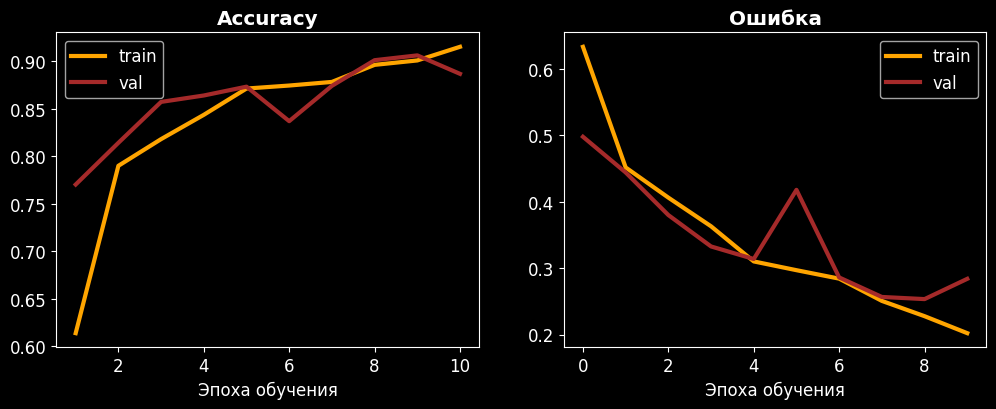

In [ ]:
plot_graph(
    model.history.history["accuracy"],
    model.history.history["val_accuracy"],
    model.history.history["loss"],
    model.history.history["val_loss"],
)

## <div style="border: 1px solid purple; padding: 10px; color: orange"> Задача 7.</div>
Напишите вывод о том, при какой архитектуре нейронной сети качество получилось лучше и почему. Также укажите в выводе, какие методы препроцессинга, регуляризации или гиперпараметры дали наибольший прирост к точности.

При работе с архитектурой сделаны следующие наблюдения:
- добавление свертки значительно улучшило метрику;
- добавление слоев BatchNormalization после Pooling снижает метрику;
- добавление слоев Dropout после Pooling метрику улучшает при значении 0.3, и ухудшает при 0.1;
- poolsize увеличение до (4,4) ухудшает метрику;
- увеличие кол-ва фильтров в слое AveragePooling не меняет показатели, но увеличивает время работы;
- замена активации relu на leaky relu в полносвязных слоях уменьшает метрику.
Вцелом, изменения метрик происходили на десятые доли, кроме добавления свертки.

*Итого:* лучший результат на тестовом датасете - accuracy = 90.6
